# Image examples

In [1]:
from easycv.io import show_grid
from easycv import Image, Pipeline
from easycv.transforms import GrayScale, Gradient, Noise, GradientMagnitude, Blur

### Loading an image

For this example we will load an image from the [Dog API](https://dog.ceo/dog-api/).

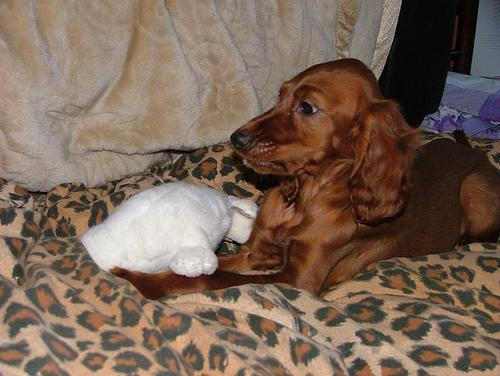

In [2]:
img = Image("https://images.dog.ceo/breeds/setter-irish/n02100877_2741.jpg")
img

### Image Propeties

We can check images properties such as width and height

In [3]:
img.height, img.width

(376, 500)

### Applying transforms/pipelines

We can apply any transforms to the image

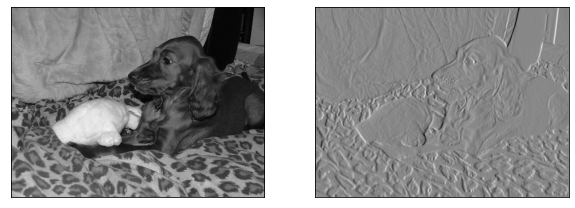

In [4]:
img_1 = img.apply(GrayScale())
img_2 = img.apply(Gradient())
show_grid([img_1, img_2])

For convenience, images above are displayed in a grid created using [show_grid()](../../reference/io/output.rst#easycv.io.output.show_grid).

We can also apply pipelines the same way

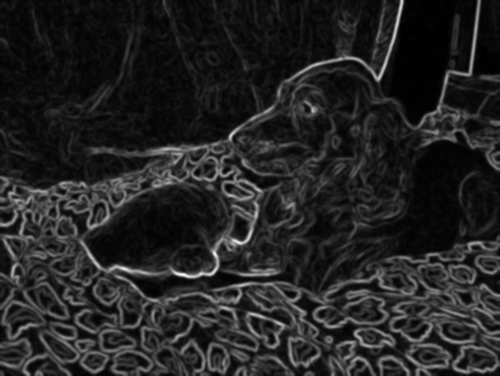

In [5]:
img_3 = img.apply(Pipeline([GradientMagnitude(),Blur()]))
img_3

### Viewing Image

To view the image in a popup window call the show method

In [6]:
img.show() # Image window pops up

### Lazy images

Lazy images delay computation while possible. To create a lazy image we just specify the lazy parameter

In [7]:
img = Image("https://images.dog.ceo/breeds/setter-irish/n02100877_2741.jpg", lazy=True)
img.loaded

False

Normally transforms/pipelines are executed in the moment. Lazy images will save them for later execution in a pipeline

In [8]:
img = img.apply(Gradient())
img.pending

Pipeline (pending) with 1 transforms
    1: Gradient (axis=x, method=sobel, size=5)

When any operation requires the updated image it will be loaded/computed. The changes are saved to prevent duplicated computation. You can force the computation with the compute method but calling any parameter/method (width, height, ...) that requires the updated image would have the same effect. Check the [reference](../../reference/image.rst#lazy-images) for more information.

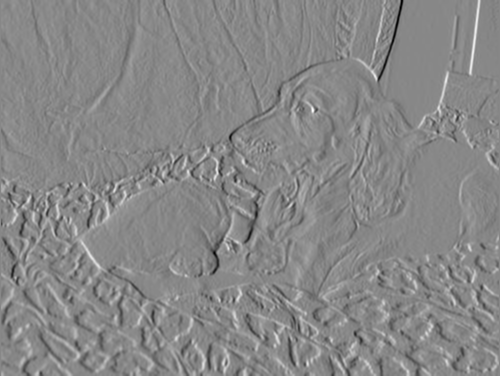

In [9]:
img.compute()

In [10]:
img.loaded

True

In [11]:
img.pending

Pipeline (pending) with 0 transforms

### Save

In the end we can save the image to a file

In [12]:
img.save("Image.jpg")